### COC351 &mdash; Matemática Computacional &mdash; 2022, Prof. Frederico Jandre ###

# Simulação de circuito com veículos #

#### Bismarck Brandi, David Silva

*****

### Índice

1. [Introdução](#1.-Introdução)
2. [Desenvolvimento](#2.-Desenvolvimento)
3. [Modelagem](#3.-Modelagem)
4. [Resultados e Discussão](#4.-Resultados-e-discussão)
5. [Conclusão](#5.-Conclusão)

# 1. Introdução #

Tecnologias emergentes na área de Sistemas de Automação e Comunicação de Veículos, como Adaptive Cruise Control(ACC) e o Cooperative Adaptive Cruise Control (CACC) tem ajudado a modificar a forma como o fluxo de tráfego é controlado e otimizado. Embora tais tecnologias tenham sido desenvolvidas para aumentar o conforto e segurança do motorista, o uso contínuo e crescente
de tais sistemas tem gerado um impacto direto no tráfego de veículos. O uso generalizado de tais sistemas pode formar uma possível solução para o enorme congestionamento de tráfego, buscando otimizar as relações entre os veículos.

# 2. Desenvolvimento #

Existem duas maneiras comuns de modelar o tráfego, a partir de uma análise microscópica ou macroscópica. Nos modelos macroscópicos, o tráfego é visto como um fluido ou gás(com uma determinada densidade máxima) e se move de acordo com as leis de conservação de massa. Já o modelo microscópico, considera o sistema como uma combinação de veículos individuais, cada um agindo de acordo com o conjunto de equações diferenciais. Neste projeto, consideramos modelos microscópicos porque estamos interessados em avaliar múltiplos sistemas compostos de veículos semiautônomos e controlados por humanos. Seria difícil adaptar modelos macroscópicos para modelar tais sistemas de uma forma interpretável. O presente trabalho visa contribuir para a modelagem do fluxo de tráfego constituído por veículos ACC, IDM e IIDM com aproximações numéricas tipicamente apropriadas como:
**RUNGE KUTTA** e **FORWARD EULER**.

Notavelmente, tanto a entrada quanto a saída são essencialmente as mesmas exigidas pelos controladores de aceleração. Esses sistemas de assistência ao motorista, muitas vezes chamados de Adaptative Cruise Control (ACC), já estão disponíveis para muitas marcas de carros. Os sistemas ACC obtêm sua entrada diretamente da taxa de rotação dos pneus (v), e por
telêmetros por radar ou laser infravermelho (s e $v_l$). A aceleração $\dot{v_l}$ pode ser calculada da velocidade $v_l$ tomando a derivada numérica do tempo (e suavizando o resultado). A saída de aceleração dos modelos que seguem o carro corresponde aos sinais que o sistema ACC envia para os controladores do motor e dos freios. O **"car following model"** em si corresponde à lógica de controle central do sistema ACC.


# 3. Modelagem #

Para este Projeto, a partir das [referências](https://edisciplinas.usp.br/pluginfile.php/5674455/mod_resource/content/0/Martin_Treiber___Arne_Kesting__auth._Traffic_FBookZZ.org.pdf), foram utilizados 4 modelos principais: IDM, IIDM, ACC e HDM.

**IDM**: O IDM é um modelo simples que pode modelar sistemas de tráfego sob todos os aspectos realistas das principais condições de tráfego. Considerada uma versão melhorada do modelo de Gipps.

Para um veículo $\alpha$, sua aceleração pode ser separada em um termo de "free road" e um termo de interação dados, respectivamente, por:

$\dot{v}_{free} = a[1 - \frac{v_\alpha}{v_0}^\delta]$ e $\dot{v}_{int} = -a(\frac{s^{\star}({v_\alpha},{\Delta}v_\alpha)}{s_\alpha})^2$

O que resulta na seguinte equação para a aceleração do veículo:

$\dot{v} = a[1 - \frac{v_\alpha}{v_0}^\delta - (\frac{s^{\star}({v_\alpha},{\Delta}v_\alpha)}{s_\alpha})^2 ]$

A distância desejada $s^{\star}$ tem um termo de equilíbrio $s_0 +vT$ e um termo dinâmico $\frac{v_\alpha\Delta v_\alpha}{2 \sqrt{ab}}$ que implementa a estratégia de frenagem inteligente.

$ s^{\star}(v_\alpha, \Delta v_\alpha) = s_0 + max(0, v_\alpha T + \frac{v_\alpha\Delta v_\alpha}{2 \sqrt{ab}})$ 

Além disso, temos que:

$s_{\alpha} = x_{\alpha−1} − x{_\alpha} = x_{l} − x_{\alpha}$

$\Delta v_{\alpha} = v_{\alpha} − v_{\alpha−1} = v_{\alpha} − v_{l}$

Tendo estes parâmetros os seguintes significados, considerando um veículo: 

a: aceleração máxima 

b: desaceleração máxima

$s_0$: distância mínima entre os pára-choques (entre o veículo e o veículo dianteiro)

$v_0$: velocidade desejada

$T$: intervalo de tempo mínimo

$\delta$: expoente de aceleração

**IIDM**: É um modelo IDM com uma função de aceleração aprimorada que visa corrigir alguns aspectos irrealistas que ocorrem quando a velocidade de um veículo está perto da velocidade desejada. 

Se $v_\alpha \leq v_0$:

$\frac{\partial v_\alpha}{\partial t} = a(1 - z_\alpha), z_\alpha > 1$
$a_{free ,\alpha} = 1 - (z_\alpha)^\frac{2a}{a_{free,a}}$, C.C

$a_{free ,\alpha} = a[1-(\frac{v_\alpha}{v_0})^\delta]$

Se $v_\alpha \geq v_0$:

$\frac{\partial v_\alpha}{\partial t} = a_{free,\alpha} + a(1 - z_\alpha^2), z_\alpha > 1$

$a_{free,\alpha}$, C.C

$a_{free ,\alpha} = -b[1-(\frac{v_0}{v_\alpha})^\frac{a\delta}{b}]$

$z_{\alpha} =\frac{s^{\star}(v_\alpha, \Delta v_\alpha)}{s_\alpha}$

**ACC**: Um sistema ACC força o veículo a desacelerar quando o veículo à frente tem uma velocidade mais baixa e, ao contrário, permite que o veículo acelere a uma velocidade pré-determinada quando o veículo  acelera. Em princípio, os parâmetros de um sistema ACC são o intervalo de tempo até o veículo líder e a velocidade desejada do veículo. O objetivo principal de tal sistema é liberar o motorista da necessidade de ajustar sua velocidade à do veiculo à frente. A  constant-acceleration heuristic(CAH) assume que os veículos terão aceleração constante em um futuro próximo, sem necessidade de distância segura ou intervalo de tempo, e os veículos vão reagir instantaneamente.

Equações: 

Se $ a_{IIDM, \alpha} \geq a_{CAH,\alpha}$:
$a_{ACC,\alpha} = a_{IIDM, \alpha} $

$a_{cc, a} = (1 − c)a_{IIDM,\alpha} + c[a_{CAH,\alpha} +b\tanh(\frac{a_{IIDM, \alpha} - a_{CAH,\alpha}}{b})]$, C.C

Se $v_{l}(v_{\alpha} − v_{l})$  $-2s_{\alpha}ã_{l}$

$a_{CAH,\alpha} = \frac{v_{\alpha}^2ã_{l}}{v_{l}^2 -2s_{\alpha}ã_{l}}$

$a_{CAH,\alpha} = ã_{l} - \frac{(v_{\alpha}−v_{l})^2\theta(v_{\alpha}−v_{l})}{2s_{\alpha}}$, C.C

$ã_{l} = min(\dot{v_{l}},a)$

**HDM**: O Human Driver Model(HDM) é uma extensão do modelo IDM que modela o comportamento humamo ao fazer algumas mudanças no IDM.
Agora existem novos conceitos como um tempo de reação finito, antecipação de vários veículos e a erros relativos ao fato que os humanos estimam os estímulos de entrada, $v$ e $v_l$ na função de aceleração. Ou seja, a velocidade agora possui um caráter estimado.

Em modelos contínuos no tempo, a resposta do motorista é dada diretamente pela função de aceleração $a_{mic}$. Portanto, vamos simplesmente introduzir um delay de reação. 

Equações:

$\alpha(t) = a_{\alpha}[s_{\alpha}(t - T_{r}), v_{\alpha}(t - T_{r}), v_{l}(t - T_{r})]$

$u(t - T_{r}) = ru_{i-j-1} + (1 - r)u_{i-j}$, $ j = int (\frac{T_{r}}{\Delta t})$, $r = \frac{T_{r}}{\Delta t} - j$

Para modelar os erros de estimativa, $s$ e $v_l$ são substituídos pelos valores estimados $s^{est}$ e $v_l^{est}$, respectivamente. Já que a velocidade $v$ do próprio motorista pode ser estimada com precisão suficiente olhando para o velocímetro, iremos negligenciar os erros associados.

A função é dada por:

$v_l^{est} − v_l = −(\Delta v^{est} − \Delta v)$ = $−s(\frac{1}{\tau_{TTC}^{est}} - \frac{1}{\tau_{TTC}^{est}}) = −s\sigma_r w_i(t)$


A regra de atualização para gerar a quantidade $w_i$ = $w(i\Delta t)$ do passo i é dada pelo "Wiener process autocorrelation function" que permite para um esquema de integração numérica simples e eficiente. 


$w_{i} = e^{\frac{-\Delta t}{\tau}}w_{i-1} + \sqrt{\frac{2\Delta t}{\tau}} \eta_i $


Novos parâmetros:

$T_{r}$: tempo de reação

$\tau^{~}$:tempo de persistência para o "Wiener process autocorrelation function" 

$V_{s}$: coeficiente de variação - desvio padrão da diferença relativa entre $(s_{\alpha})^{est}$  e  $s_{\alpha}$

$\sigma_{r}$: desvio padrão da taxa de aproximação relativa

$\sigma_{a}$:desvio padrão do erro de aceleração

$\eta_i$ são instâncias de i.i.d. geradas por computador. números pseudo-aleatórios com
expectativa zero e variância unitária

$\tau_{TTC} = \frac{s}{\Delta v}$ O indicador de tempo de segurança até a colisão, é definido pelo
intervalo de tempo hipotético até uma colisão se nenhum dos veículos acelerar ou frear.

Erros de condução e irregularidades no estilo de condução resultam em componentes erráticos do
ação do motorista, ou seja, aceleração. Isso pode ser modelado adicionando à função de aceleração
$a_{mic}$ algum ruído de aceleração de desvio padrão $σ_a$ cujo dependência do tempo é modelada por um processo de Wiener.

$\dot{v}_{\alpha(t)} = a_{mic}(s_{\alpha}^{est}),v_{\alpha}, v_{l}^{est}) + \sigma_\alpha w_{\alpha,\alpha}(t)$

Em suma, Ao aplicar as ovas especificidades ao IDM, obtemos o modelo Human Driver(HDM):

$\dot{v} = a_{free}^{IDM}(v_\alpha) + c_{IDM} \sum_{\beta=\alpha-n_\alpha}^{\alpha-1}a_{int}^{IDM}(s_{\alpha\beta}^{prog},v_{\alpha}^{prog},s_{\beta}^{prog})$

Sendo,

$v^{prog}(t) = v^{est}(t − T_r) + T_r\dot{v}(t − T_r)$

$c_{IDM} = (\sum_{j=1}^{n_\alpha}\frac{1}{j^2})^{-1}$, o fator de redução independente de velocidade.

$v_l^{prog}(t) = v^{est}(t − T_r)$

$s^{prog}(t) = s^{est}-T_r\Delta v^{est}(t − T_r)$

# 4. Resultados e discussão #

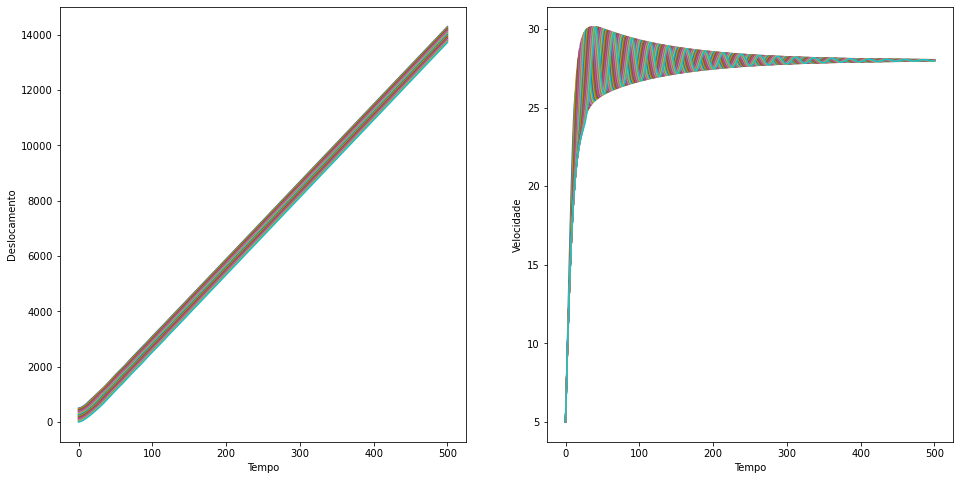

C:\Users\bisma\anaconda3\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


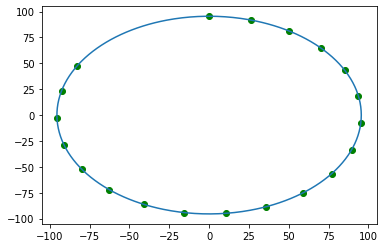

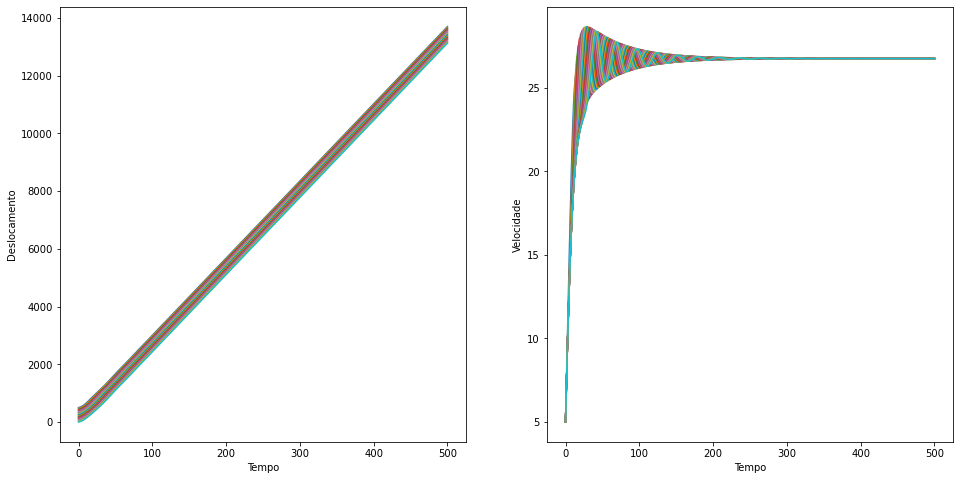

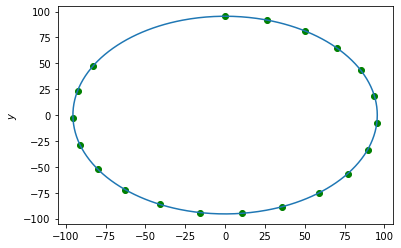

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def x_dash(t, v):
    return v

def x(x0, v, t):  #posição
    return x0 + v*t

def s_asterisco(v, delta_v,params): #Distância desejada
    s0 = params['s0'] #Distância entre os para-choques
    T = params['T'] #Intervalo de tempo entre os para-choques
    a = params['a'] #Aceleração máxima
    b = params['b'] #Desaceleração máxima
    zeros = np.zeros(len(delta_v))
    return s0 + np.amax(np.vstack((zeros,v*T + v*delta_v/(2*np.sqrt(a*b)))),axis=0) #Eq. 11.15

def a_IDM(v,s,delta_v,params): #IDM
    a = params['a']
    delta = params['delta']
    v0 = params['v0'] #velocidade desejada
    return a*(1-(v/v0)**(delta) - (s_asterisco(v, delta_v, params)/s)**2) #Eq. 11.14

def a_free_f(v,s,delta_v,params):#page 196
    a = params['a']
    delta = params['delta']
    v0 = params['v0']
    b = params['b']
    comp = (v<=v0)
    return comp*(a*(1-(v/v0)**delta))+(1-comp)*(-b*(1-(v0/v)**(a*delta/b))) #Eq. 11.22

def a_IIDM(v,s,delta_v,params): #Improved IDM
    a = params['a']
    v0 = params['v0']
    z = s_asterisco(v, delta_v, params)/s
    v_comp = (v <= v0)
    z_comp = (z >= 1)
    a_free = a_free_f(v,s,delta_v,params)
    dv_dt = np.zeros(v.shape) 
    #Eq. 11.23 e 11.24
    dv_dt += v_comp * z_comp * (a*(1-z**2))
    # Com v <= v0 e z < 1
    dv_dt += v_comp * (1-z_comp) * (a_free*(1-z**(2*a/a_free)))
    # Com v > v0 e z >= 1
    dv_dt += (1-v_comp) * z_comp * (a_free+a*(1-z**2))
    # Com v > v0 e z < 1
    dv_dt += (1-v_comp) * z_comp * (a_free)
    return dv_dt

def a_CAH(s, v, vl, v_dash_l,params): #constant-acceleration heuristic Eq. 11.25
    a = params['a']
    delta = params['delta']
    v0 = params['v0']
    ã_l = np.minimum(v_dash_l, a)
    comp = ((vl*(v-vl))<=(-2*s*ã_l))
    return ((np.square(v)*ã_l/(np.square(vl) - 2*s*ã_l) * comp) + (ã_l - (np.square(v-vl)*((v-vl)>0)/(2*s)))*(1-comp))

def a_ACC(s, v, vl, a_iidm, params): #ACC Eq. 11.26 
    c = params['c']
    b = params['b']
    v_dash_l = np.roll(a_iidm,1)
    a_cah = a_CAH(s, v, vl, v_dash_l, params)
    comp = a_iidm >= a_cah
    return ((a_iidm * comp) + ((1-c)*a_iidm + c*(a_cah + b*np.tanh((a_iidm-a_cah)/b)))*(1-comp))

def x_v_dash(x_v, t, params):
    x_v = x_v.reshape(2,-2) # derivada da posição e velocidade
    v = x_v[1,:] # obter velocidades
    x_vec = x_v[0,:] # obter posições
    # Pista circular, carro 0 segue o carro n-1, delta_v = v[i] - v[i-1]
    vl = np.roll(v,1)
    delta_v = v - vl # diferença entre as velocidades
    s = np.roll(x_vec,1) - x_vec
    s[0] += params['fim_da_pista']
    if params['IDM_model_num'] == 1:
        dvdt = a_IDM(v,s,delta_v,params)
    else:
        dvdt = a_IIDM(v,s,delta_v,params)
    if params['IDM_model_num'] == 2:
        dvdt = a_ACC(s, v, vl, dvdt, params)
    x_v = np.concatenate((v,dvdt))
    return x_v

def runge_kutta_4(x_v_vec_k, x_v_dash, t_k, h, params): #Runge-Kutta 4th Order 
    k1=x_v_dash(x_v_vec_k,t_k, params)
    k2=x_v_dash(x_v_vec_k+0.5*h*k1,t_k+0.5*h, params)
    k3=x_v_dash(x_v_vec_k+0.5*h*k2,t_k+0.5*h, params)
    k4=x_v_dash(x_v_vec_k+h*k3,t_k+h, params)
    x_v_vec_k_next = x_v_vec_k + h/6.0 * (k1 + 2*k2 + 2*k3 + k4)
    params['x_v_dash'].append(k1)
    return x_v_vec_k_next

def run_simulation(params):
    v = np.ones(params['n_carros']) * params['v_inicial']
    x_vec = np.linspace(0,params['fim_da_pista']-params['fim_da_pista']/6,params['n_carros'])
    x_vec = x_vec[::-1] # inverter as posições 
    x_v_vec = np.concatenate(([x_vec], [v]), axis=0).reshape(1,-1)[0] # criar um vetor de velocidade
    ts = np.linspace(0,params['tempo_total'],params['passos_tempo'])
    y_s = []
    y_s.append(x_v_vec)
    for i in range(1,len(ts)):
        y_s.append(runge_kutta_4(y_s[-1], x_v_dash, ts[i], ts[i]-ts[i-1], params))
    y_s = np.array(y_s)
    return y_s


if __name__ == '__main__':
    # Parametros 
    params = dict()
    params['v0'] = 50.0 # velocidade desejada (m/s)
    params['v_inicial'] = 5.0 # velocidade inicial
    params['T'] = 1.0 # Tempo entre-carros 
    params['a'] = 2.0 # aceleração maxima (m/s^2)
    params['b'] = 3.0 # desaceleração (m/s^2)
    params['delta'] = 4.0 # expoente de aceleração
    params['s0'] = 2.0 # intervalo minimo (m)
    params['fim_da_pista'] = 600 #(m)
    params['passos_tempo'] = 1000 # numero de intervalo de tempo
    params['n_carros'] = 20 # numero de carros
    params['tempo_total'] = 500 # tempo total(s)
    params['c'] = 0.99 # fator de correção
    params['t_inicial'] = 0.0 #tempo inicial
    params['passo_tempo'] = (params['tempo_total']-params['t_inicial'])/float(params['passos_tempo'])
    params['x_v_dash'] 	= [2*np.zeros(params['n_carros'])]

    v0 = params['v0']
    v_inicial = params['v_inicial']
    T = params['T']
    a = params['a']
    b = params['b']
    delta = params['delta']
    s0 = params['s0']
    fim_da_pista = params['fim_da_pista']
    passos_tempo = params['passos_tempo']
    n_carros = params['n_carros']
    tempo_total = params['tempo_total']
    for model in range(2): #0 == IDM / 1 == IIDM / 2 == ACC
        params['IDM_model_num'] = model
        v = np.ones(n_carros) * v_inicial
        x_vec = np.linspace(0,fim_da_pista-fim_da_pista/6,n_carros)
        x_vec = x_vec[::-1]
        x_v_vec = np.concatenate(([x_vec], [v]), axis=0).reshape(1,-1)[0]
        ts = np.linspace(0,tempo_total,passos_tempo)
        y_s=[]
        y_s.append(x_v_vec)
        for i in range(1,len(ts)):
            y_s.append(runge_kutta_4(y_s[-1], x_v_dash, ts[i], ts[i]-ts[i-1], params))
        y_s = np.array(y_s)
        # Plot posição e velocidade de cada carro
        fig, axes = plt.subplots(1,2, figsize=(16,8))
        for car in range(n_carros):
            axes[0].plot(ts, y_s[:,car])
        # Plot velocidade em função do tempo
        for car in range(n_carros):
            axes[1].plot(ts, y_s[:,car+n_carros])
        axes[0].set_xlabel('Tempo')
        axes[0].set_ylabel('Deslocamento') 
        axes[1].set_xlabel('Tempo')
        axes[1].set_ylabel('Velocidade')
        plt.show()
        # Plot carros rodando em circulos
        r = (fim_da_pista/(2*np.pi))
        fx = lambda x_vec: r*np.sin((x_vec/fim_da_pista)*2*np.pi)
        fy = lambda x_vec: r*np.cos((x_vec/fim_da_pista)*2*np.pi)
        fig, ax = plt.subplots()
        t = np.arange(0, fim_da_pista, dtype=np.float32)
        t_pos = np.linspace(0, 2*np.pi, n_carros)
        line, = ax.plot(fx(t), fy(t))
        cars = ax.scatter(fx(x_vec), fy(x_vec), c='g')
    def animate(i):
        x_vec = y_s[i,:n_carros]
        x_vec = np.remainder(x_vec, fim_da_pista)
        new_pos = np.concatenate(([fx(x_vec)], [fy(x_vec)]), axis=0)
        cars.set_offsets(new_pos.T)
        return cars,
    def init():
        return cars,
    ani = animation.FuncAnimation(fig, animate, range(passos_tempo), init_func=init, interval=1, blit=False)
    ax.set_ylabel('$x$')
    ax.set_ylabel('$y$')
    plt.show()


### HDM:

Iteração:200
Iteração:400
Iteração:600
Iteração:800


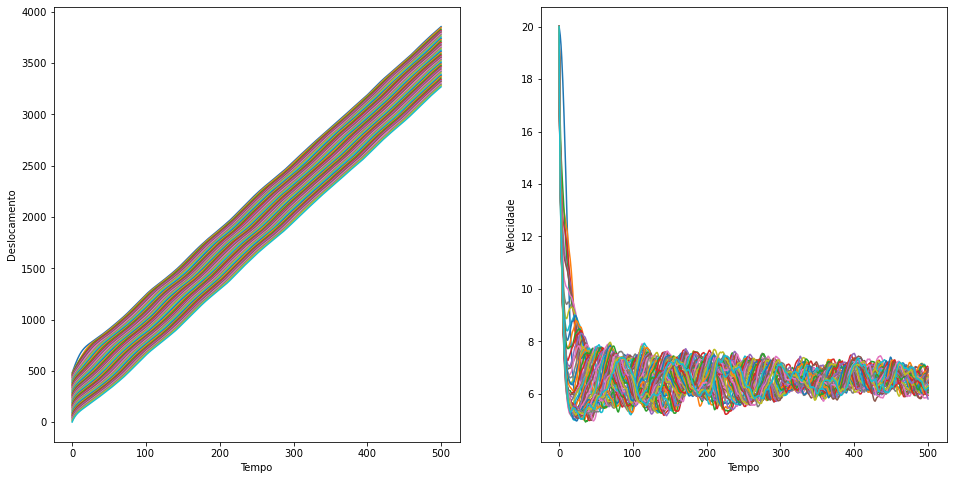

In [2]:
import numpy as np
import math
from IDM import a_IDM, s_asterisco, x_dash, x
import matplotlib.pyplot as plt
from collections import deque

def interp(u,i,params): #Eq. 12.2
    j = params['j']
    r = params['r']
    u_interp = r*u[i-j-1] + (1-r)*u[i-j]
    return u_interp

def wiener_process(tau_til, params): #Eq. 12.11
    dt = params['passo_tempo']
    n_carros = params['n_carros']
    passos_tempo = params['passos_tempo']
    w0 = np.random.randn(n_carros)
    w = np.zeros((n_carros, passos_tempo))
    w[:, 0] = w0
    for passo_tempo in range(1, int(passos_tempo)):
        w[:, passo_tempo] = np.exp(-dt/tau_til)*w[:, passo_tempo-1] + np.sqrt(2*dt/tau_til)*np.random.randn(n_carros)
    return w

def a_IDM_free(v,params): #Eq. 12.21
    a = params['a']
    v0 = params['v0']
    delta = params['delta']
    return a*(1-(v/v0)**delta)

def a_IDM_int(v,s,delta_v,params): #Eq. 12.21
    a = params['a']
    return -a*(s_asterisco(v, delta_v, params)/s)**2

def x_v_dash(x_v, t,params):
    passo_tempo = params['passo_tempo']
    passos_tempo = params['passos_tempo']
    sigma_r = params['sigma_r']
    sigma_a = params['sigma_a']
    Vs = params['Vs']
    w_s = params['w_s']
    w_l = params['w_l']
    w_a = params['w_a']
    x_v = x_v.reshape(2,-2)
    v = x_v[1,:]
    x_vec = x_v[0,:]
    s = np.roll(x_vec,1) - x_vec
    s[0] += fim_da_pista
    index = math.floor(t/passo_tempo) if math.floor(t/passo_tempo) < passos_tempo else passos_tempo-1
    s_est = s * np.exp(Vs * w_s[:, index]) #Eq. 12.4
    # estimar v^est
    v_l_est = np.roll(v,1) - s*sigma_r*w_l[:, index] #Eq. 12.6
    delta_v_est = v - v_l_est
    # estimar aceleração com erro
    dvdt = a_IDM(v,s_est,delta_v_est,params) + sigma_a*w_a[:, index] #Eq. 12.12
    x_v = np.concatenate((v,dvdt))
    return x_v

def x_v_dash2(x_v, t,params,past):
    passo_tempo = params['passo_tempo']
    passos_tempo = params['passos_tempo']
    sigma_r = params['sigma_r']
    sigma_a = params['sigma_a']
    Vs = params['Vs']
    w_s = params['w_s']
    w_l = params['w_l']
    w_a = params['w_a']
    x_v = x_v.reshape(2,-2)
    v = x_v[1,:]
    x_vec = x_v[0,:]
    n_a = params['n_a']
    n_carros = params['n_carros']
    Tr = params['Tr']
    s = np.roll(x_vec,1) - x_vec
    s[0] += fim_da_pista
    index = int(math.floor(t/passo_tempo)) if math.floor(t/passo_tempo) < passos_tempo else passos_tempo-1
    s_est = s * np.exp(Vs * w_s[:, index])
    v_l_est = np.roll(v,1) - s*sigma_r*w_l[:, index]

    past['past_v_l_est_s'].append(v_l_est)
    delta_v_est = v - v_l_est
    past['past_delta_v_est_s'].append(delta_v_est)
    past_v_l_est_s = np.array(past['past_v_l_est_s'])
    past_v_est_s = np.roll(past_v_l_est_s,-1)
    past_dvdt = np.array(past['past_dvdt'])
    past_delta_v_est_s = np.array(past['past_delta_v_est_s'])

    if past_v_est_s.shape[0] > int(Tr/passo_tempo)+1:
        v_l_prog = interp(past_v_l_est_s,0,params)
        v_prog = interp(past_v_est_s,0,params) + Tr * interp(past_dvdt,0,params)
        s_prog = s_est - Tr * interp(past_delta_v_est_s,0,params)
        c_idm = np.sum([1./j**2 for j in range(1, n_a+1)])**(-1)
        free_term = a_IDM_free(v, params)
        dvdt = np.zeros(v.shape)
        for alpha in range(n_carros):  #Eq 12.20
            free_term_alpha = free_term[alpha]
            int_term = 0.0
            v_alpha_prog = np.array([v_prog[alpha]])
            for beta in range(alpha-n_a,alpha):
                sum_idxs = np.arange(beta+1,alpha+1)
                s_alpha_beta_prog = np.array([np.sum(s_prog[sum_idxs])])
                v_beta_prog = np.array([v_l_prog[beta]])
                int_term += a_IDM_int(v_alpha_prog,s_alpha_beta_prog,v_alpha_prog-v_beta_prog,params)
                dvdt[alpha] = free_term_alpha + c_idm*int_term
    else:
        dvdt = a_IDM(v,s_est,delta_v_est,params) + sigma_a*w_a[:, index]
    x_v = np.concatenate((v,dvdt))
    past['past_dvdt'].append(dvdt)
    return x_v

def runge_kutta_4(x_v_vec_k, x_v_dash, t_k, h,params,past):
    k1=x_v_dash(x_v_vec_k,t_k,params,past)
    k2=x_v_dash(x_v_vec_k+0.5*h*k1,t_k+0.5*h,params,past)
    k3=x_v_dash(x_v_vec_k+0.5*h*k2,t_k+0.5*h,params,past)
    k4=x_v_dash(x_v_vec_k+h*k3,t_k+h,params,past)
    x_v_vec_k_next = x_v_vec_k + h/6.0 * (k1 + 2*k2 + 2*k3 + k4)
    return x_v_vec_k_next

if __name__ == '__main__':
    np.random.seed(0)
    params = dict()
    params['v0'] = 20.0 
    params['v_inicial'] = 20.0 
    params['T'] = 1.5 
    params['a'] = 1.0
    params['b'] = 3.0 
    params['delta'] = 4.0 
    params['s0'] = 2.0 
    params['fim_da_pista'] = 600 
    params['passos_tempo'] = 1000 
    params['tempo_inicial'] = 0.0
    params['n_carros'] = 50 
    params['tempo_total'] = 500 
    params['passo_tempo'] = (params['tempo_total'] - params['tempo_inicial'])/params['passos_tempo']
    params['Tr'] = 0.6 
    params['Vs'] = 0.1 
    params['sigma_r'] = 0.01 
    params['sigma_a']= 0.1  
    params['tau_til'] = 20.0 
    params['tau_a_til'] =  1.0 
    v0 = params['v0']
    init_v = params['v_inicial']
    T = params['T']
    a = params['a']
    b = params['b']
    delta = params['delta']
    s0 = params['s0']
    fim_da_pista = params['fim_da_pista']
    passos_tempo = params['passos_tempo']
    n_carros = params['n_carros']
    tempo_total = params['tempo_total']
    Tr = params['Tr']
    Vs = params['Vs']
    sigma_r = params['sigma_r']
    sigma_a = params['sigma_a']
    tau_til = params['tau_til']
    tau_a_til = params['tau_a_til']
    tempo_inicial = params['tempo_inicial']
    passo_tempo = params['passo_tempo']
    params['n_a'] = 3 # numero de veiculos que o motorista vê
    params['w_s'] = wiener_process(tau_til, params)
    params['w_l'] = wiener_process(tau_til, params)
    params['w_a'] = wiener_process(tau_a_til, params)
    params['j'] = int(Tr/passo_tempo) # numero de passo de tempo para reação
    params['r'] = Tr/passo_tempo - params['j'] 
    past = dict()
    past['past_v_l_est_s'] = deque(maxlen=params['j']+2)
    past['past_delta_v_est_s'] = deque(maxlen=params['j']+2)
    past['past_dvdt'] = deque(maxlen=params['j']+2)
    v = np.ones(n_carros) * v0 
    x_vec = np.linspace(0,fim_da_pista-fim_da_pista/5,n_carros)
    x_vec = x_vec[::-1]
    ts = np.linspace(tempo_inicial,tempo_total,passos_tempo) 
    x_v_vec = np.concatenate(([x_vec], [v]), axis=0).reshape(1,-1)[0]
    y_s = []
    y_s.append(x_v_vec)
    for i in range(1,len(ts)):
        y_s.append(runge_kutta_4(y_s[-1], x_v_dash2, ts[i], ts[i]-ts[i-1],params,past))
        if i %200 == 0:
            print ("Iteração:{}".format(i))
    y_s = np.array(y_s)
    fig, axes = plt.subplots(1,2, figsize=(16,8))
    for car in range(n_carros):
        axes[0].plot(ts, y_s[:,car])
    for car in range(n_carros):
        axes[1].plot(ts, y_s[:,car+n_carros])
    axes[0].set_xlabel('Tempo')
    axes[0].set_ylabel('Deslocamento')
    axes[1].set_xlabel('Tempo')
    axes[1].set_ylabel('Velocidade')
    plt.show()



# Conclusões

E notório que os modelos IDM geram mais "ondas" do que os modelos HDM, em um fator proporcional ao aumento no número de veículos. Isto deriva do fato de que os motoristas humanos tendem a ser mais conservadores, já que a visão de um ou mais carros à frente os impede de se aproximarem além de uma distância segura.
Já nos modelos IDM e ACC. Ao tentar maximizar o deslocamento total, os carros dirigem rapidamente e se aproximam, resultando na criação de ondas no sistema. Os carros dirigem de forma muito mais conservadora, nunca ficando dentro do alcance de outro carro, o que faria com que eles alterassem sua aceleração.
Contudo, também é visível que os modelos IDM possuem um deslocamento maior no mesmo intervalo de tempo.